# Workshop # 10 - Hierachical Clustering

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [7]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [8]:
x = df3.iloc[:,1:7]
x.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,0,1
1,1,38.0,1,0,1,0
2,3,26.0,0,0,1,0
3,1,35.0,1,0,1,0
4,3,35.0,0,0,0,1


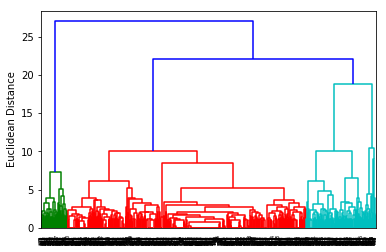

In [11]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(x, 
                   metric='euclidean',
                   method='average')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

In [10]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='average')

prediction = ac.fit_predict(x)
print('Cluster labels: %s\n' % prediction)

Cluster labels: [1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 

In [14]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(prediction, [1, 0]).astype(np.int64)

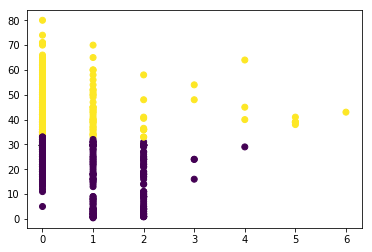

In [23]:
plt.scatter(x.iloc[:, 3], x.iloc[:, 1], c=predY);

**Homogeneity** : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. Range from 0 (Worst) to 1 (best)

**Completeness** : A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Range from 0 (Worst) to 1 (best)

**V-measure** is the harmonic mean between homogeneity and completeness:
v = (1 + beta) * homogeneity * completeness
     / (beta * homogeneity + completeness)
     Range from 0 (Worst) to 1 (best)
     
**Adjusted Mutual Information (AMI)** is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. Range from -1 to 1 (Best)

**Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
Range from -1 to 1 (Best), 0 mean overlapping clusters.

In [22]:
labels = ac.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.8f" % metrics.homogeneity_score(df3['Survived'], labels))
print("Completeness: %0.8f" % metrics.completeness_score(df3['Survived'], labels))
print("V-measure: %0.8f" % metrics.v_measure_score(df3['Survived'], labels))
print("Adjusted Rand Index: %0.8f"
      % metrics.adjusted_rand_score(df3['Survived'], labels))
print("Adjusted Mutual Information: %0.8f"
      % metrics.adjusted_mutual_info_score(df3['Survived'], labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.8f"
      % metrics.silhouette_score(x, labels))


Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.00039692
Completeness: 0.00044224
V-measure: 0.00041836
Adjusted Rand Index: 0.00362123
Adjusted Mutual Information: -0.00047238
Silhouette Coefficient: 0.53368105
